In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# Load the dataset
df = pd.read_csv('All_Dropped.csv')

In [51]:
df

,Unnamed: 0,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,BEGIN_TIME,...,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
0,0,201301,24,19791,421108,I,NaN,0,Vehicle/Towed Trailer,700,...,BRYAN,OUN,CST-6,0,0,0,1,0.0,0,ASOS
1,1,201301,27,19574,421872,D,28.0,F,Outside/Open Areas,1525,...,SALT RIVER & WYOMING RANGES,RIW,MST-7,0,0,1,0,0.0,0,Newspaper
2,2,201301,27,19575,421873,D,30.0,M,Outside/Open Areas,1700,...,TETON & GROS VENTRE MOUNTAINS,RIW,MST-7,0,0,1,0,0.0,0,Newspaper
3,3,201301,13,19577,422507,I,42.0,M,Vehicle/Towed Trailer,1100,...,FRANKLIN,PAH,CST-6,0,0,0,1,0.0,0,Trained Spotter
4,4,201301,19,19578,422671,D,60.0,M,In Water,1245,...,SEBASTIAN INLET TO JUPITER INLET 0-20NM,MLB,EST-5,0,0,1,0,0.0,0,Newspaper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,8113,202301,12,48678,1079341,I,NaN,0,Other,1627,...,NEWTON,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey
8114,8114,202301,12,48677,1079341,D,NaN,0,Vehicle/Towed Trailer,1627,...,NEWTON,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey
8115,8115,202301,12,48680,1079342,I,NaN,0,Other,1627,...,JASPER,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey
8116,8116,202301,12,48679,1079342,D,NaN,0,Vehicle/Towed Trailer,1627,...,JASPER,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey


In [52]:
# Define features and target variable
numeric_features = [
    'FAT_YEARMONTH', 'FAT_DAY', 'FATALITY_ID', 
    'END_DAY', 'INJURIES_DIRECT','INJURIES_INDIRECT',
    'DEATHS_DIRECT','DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS'
]
categorical_features = [
    'EVENT_TYPE', 'FATALITY_TYPE', 'FATALITY_SEX', 'FATALITY_LOCATION',
    'STATE', 'MONTH_NAME', 'CZ_TYPE', 'CZ_NAME', 'WFO', 'CZ_TIMEZONE',
    'SOURCE'
]
target_variable = 'FATALITY_AGE'

In [53]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [54]:
# Identify missing values
missing_values = df[target_variable].isna()

In [55]:
missing_values

0        True
1       False
2       False
3       False
4       False
        ...  
8113     True
8114     True
8115     True
8116     True
8117    False
Name: FATALITY_AGE, Length: 8118, dtype: bool

In [56]:
# Separate data into missing and non-missing values
df_known = df[~missing_values]
df_missing = df[missing_values]

In [57]:
df_missing

,Unnamed: 0,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_AGE,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,...,SOURCE_Public,SOURCE_RAWS,SOURCE_River/Stream Gage,SOURCE_SNOTEL,SOURCE_Social Media,SOURCE_State Official,SOURCE_Storm Chaser,SOURCE_Trained Spotter,SOURCE_Unknown,SOURCE_Utility Company
0,0,201301,24,19791,421108,NaN,700,1,1500,70119,...,0,0,0,0,0,0,0,0,0,0
8,8,201301,27,19798,423269,NaN,1200,27,1800,70466,...,0,0,0,0,0,0,0,1,0,0
19,19,201303,3,19680,427678,NaN,1300,3,1330,71167,...,0,0,0,0,0,0,0,0,0,0
22,22,201301,11,19691,428112,NaN,1550,11,1553,71235,...,0,0,0,0,0,0,0,0,0,0
23,23,201301,11,19692,428112,NaN,1550,11,1553,71235,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,8112,202301,12,48675,1079340,NaN,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0
8113,8113,202301,12,48678,1079341,NaN,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0
8114,8114,202301,12,48677,1079341,NaN,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0
8115,8115,202301,12,48680,1079342,NaN,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Separate features and target variable for known data
X_known = df_known.drop(target_variable, axis=1)
y_known = df_known[target_variable]

In [59]:
# Split the known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_known, y_known, test_size=0.2, random_state=42
)

In [60]:
# Initialize and train the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
# Predict missing values
y_pred_missing = dt_regressor.predict(df_missing.drop(target_variable, axis=1))

In [62]:
# Fill missing values with predictions
df_missing.loc[:, target_variable] = y_pred_missing

C:\Users\kinfa\AppData\Local\Temp\ipykernel_6212\1802041337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing.loc[:, target_variable] = y_pred_missing


In [63]:
df_missing

,Unnamed: 0,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_AGE,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,...,SOURCE_Public,SOURCE_RAWS,SOURCE_River/Stream Gage,SOURCE_SNOTEL,SOURCE_Social Media,SOURCE_State Official,SOURCE_Storm Chaser,SOURCE_Trained Spotter,SOURCE_Unknown,SOURCE_Utility Company
0,0,201301,24,19791,421108,42.0,700,1,1500,70119,...,0,0,0,0,0,0,0,0,0,0
8,8,201301,27,19798,423269,55.0,1200,27,1800,70466,...,0,0,0,0,0,0,0,1,0,0
19,19,201303,3,19680,427678,46.0,1300,3,1330,71167,...,0,0,0,0,0,0,0,0,0,0
22,22,201301,11,19691,428112,48.0,1550,11,1553,71235,...,0,0,0,0,0,0,0,0,0,0
23,23,201301,11,19692,428112,48.0,1550,11,1553,71235,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,8112,202301,12,48675,1079340,30.0,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0
8113,8113,202301,12,48678,1079341,73.0,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0
8114,8114,202301,12,48677,1079341,30.0,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0
8115,8115,202301,12,48680,1079342,73.0,1627,12,1701,177365,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Concatenate known and predicted missing values
df_imputed = pd.concat([df_known, df_missing])

In [65]:
# Calculate performance metrics for the known data
y_pred_train = dt_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"R-squared (Train): {r2_train}")

Mean Squared Error (Train): 0.0
R-squared (Train): 1.0


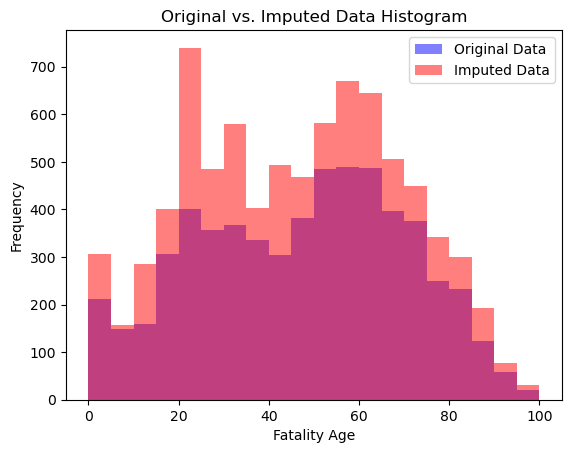

In [71]:
import matplotlib.pyplot as plt

# Plot original data histogram
plt.hist(df['FATALITY_AGE'], bins=20, alpha=0.5, color='blue', label='Original Data')

# Plot imputed data histogram
plt.hist(df_imputed['FATALITY_AGE'], bins=20, alpha=0.5, color='red', label='Imputed Data')

# Add labels and legend
plt.xlabel('Fatality Age')
plt.ylabel('Frequency')
plt.title('Original vs. Imputed Data Histogram')
plt.legend()

# Show plot
plt.show()

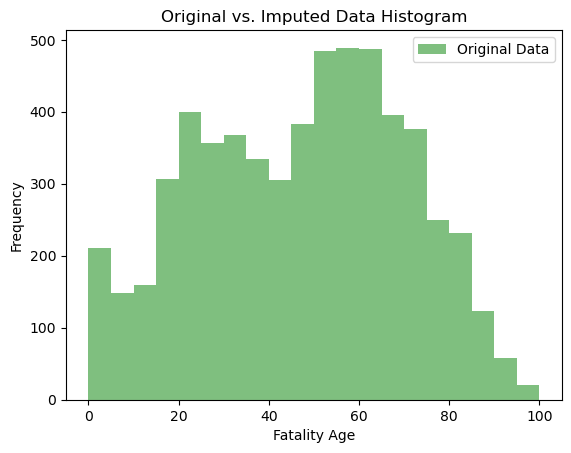

In [69]:
import matplotlib.pyplot as plt

# Plot original data histogram
plt.hist(df['FATALITY_AGE'], bins=20, alpha=0.5, color='green', label='Original Data')
plt.xlabel('Fatality Age')
plt.ylabel('Frequency')
plt.title('Original Histogram')
plt.legend()

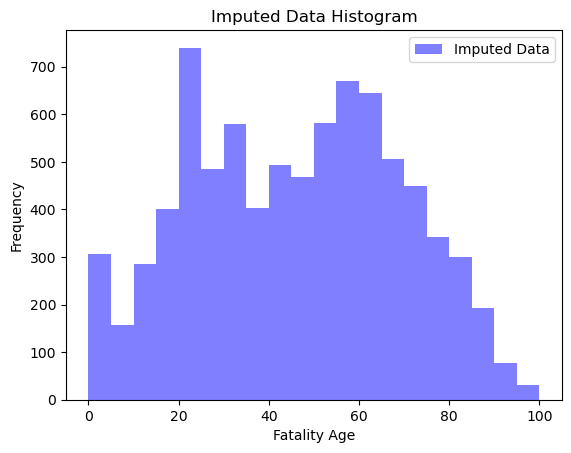

In [72]:

# Plot imputed data histogram
plt.hist(df_imputed['FATALITY_AGE'], bins=20, alpha=0.5, color='blue', label='Imputed Data')
# Add labels and legend
plt.xlabel('Fatality Age')
plt.ylabel('Frequency')
plt.title('Imputed Data Histogram')
plt.legend()